# Data Visualization with Datawrapper API

## Environment settings

*Update pip repository*
`!pip install --upgrade pip`

*Install datawrapper*
`!pip install datawrapper`

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from datawrapper import Datawrapper

In [2]:
# Token gotten from datawrapper api 
filename = "../APIs/credentials.json"
# read json file
with open(filename) as f:
    keys = json.load(f)
# read credentials
token = keys["datawrapper_api"]

In [3]:
# Acces datawrapper
dw = Datawrapper(access_token = token)
# Check if the account is correctly initialized
#dw.account_info() 

## Data cleansing and analysis

In [4]:
# Read csv file by getting path from 'content/drive/MyDrive/Colab Notebooks/my-data/'
df = pd.read_csv('../Datasets/owid-covid-data.csv')

In [5]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
# select relevant column numbers to filter
fields = [1,2,3,4,7,]
# filter dataframe by relevant columns
new_df = df.iloc[:, fields]
# convert to datetime
new_df.date = pd.to_datetime(new_df.date)
new_df

/var/folders/jy/hhl49vr95cdgq4r9c_fgwhd80000gn/T/ipykernel_899/2073270063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.date = pd.to_datetime(new_df.date)


,continent,location,date,total_cases,total_deaths
0,Asia,Afghanistan,2020-02-24,5.0,NaN
1,Asia,Afghanistan,2020-02-25,5.0,NaN
2,Asia,Afghanistan,2020-02-26,5.0,NaN
3,Asia,Afghanistan,2020-02-27,5.0,NaN
4,Asia,Afghanistan,2020-02-28,5.0,NaN
...,...,...,...,...,...
156108,Africa,Zimbabwe,2022-01-16,226078.0,5247.0
156109,Africa,Zimbabwe,2022-01-17,226460.0,5258.0
156110,Africa,Zimbabwe,2022-01-18,226460.0,5258.0
156111,Africa,Zimbabwe,2022-01-19,226887.0,5266.0


In [7]:
covid = new_df.groupby(pd.Grouper(key='date', freq='M')).agg(np.sum).reset_index()
covid.tail()

/var/folders/jy/hhl49vr95cdgq4r9c_fgwhd80000gn/T/ipykernel_899/3541726121.py:1: FutureWarning: The operation <function sum at 0x13312eac0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  covid = new_df.groupby(pd.Grouper(key='date', freq='M')).agg(np.sum).reset_index()


,date,total_cases,total_deaths
20,2021-09-30,2.836909e+10,582365894.0
21,2021-10-31,3.109041e+10,631472610.0
22,2021-11-30,3.188990e+10,638262672.0
23,2021-12-31,3.551551e+10,688852954.0
24,2022-01-31,2.637669e+10,458797939.0


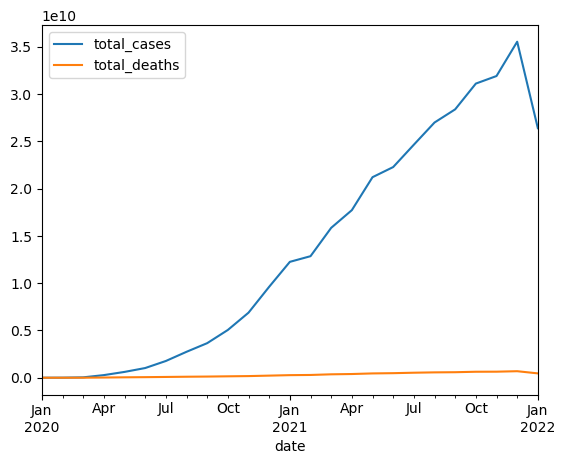

In [8]:
# create chart
covid.plot(x='date', y=['total_cases', 'total_deaths'])
plt.show()

## Datawrapper chart creation

In [9]:
# Create chart in Datawrapper
covid_chart = dw.create_chart(
    title = "Covid disease, Cases and Deaths, 2020-2022",
    chart_type = 'd3-lines',
    data = covid
    )

In [10]:
# Get data from Datawrapper chart
covid_chart

{'publicId': 'DVXOr',
 'language': 'en-US',
 'theme': 'datawrapper',
 'title': 'Covid disease, Cases and Deaths, 2020-2022',
 'type': 'd3-lines',
 'lastEditStep': 3,
 'metadata': {'data': {'changes': [],
   'transpose': False,
   'vertical-header': True,
   'horizontal-header': True},
  'describe': {'source-name': '',
   'source-url': '',
   'intro': '',
   'byline': '',
   'aria-description': '',
   'number-format': '-',
   'number-divisor': 0,
   'number-append': '',
   'number-prepend': ''},
  'visualize': {'dark-mode-invert': True,
   'highlighted-series': [],
   'highlighted-values': [],
   'sharing': {'enabled': False}},
  'axes': {},
  'publish': {'embed-width': 600,
   'embed-height': 400,
   'blocks': {'logo': {'enabled': False},
    'embed': False,
    'download-pdf': False,
    'download-svg': False,
    'get-the-data': True,
    'download-image': False},
   'export-pdf': {}},
  'annotate': {'notes': ''},
  'custom': {}},
 'authorId': 410058,
 'id': 'DVXOr',
 'lastModifiedAt

In [11]:
# Publish in Datawrapper
dw.publish_chart(covid_chart['id'], display=False)

## Datawrapper chart customization

In [12]:
# Update chart after customizing it
dw.update_description(
  covid_chart['id'],
  source_name = 'owid-covid-data',
  source_url = '',
  intro = 'Evolution of cases and deaths worlwide',
  byline = 'Created with Python 🐍',
)

In [13]:
properties = {
  'visualize' : {
    'thick': True,
    'custom-colors': {
      "total_cases": '#7e5703',
      "total_deaths": '#7b0000',
    },
  }
}
dw.update_metadata(covid_chart['id'], properties)

## Chart visualization

In [17]:
# Display chart in jupyterlab
print('\n')
dw.display_chart(covid_chart['id'])

![chart](covid.png)

## Chart sahring with Datawrapper iframe

In [15]:
# Get iframe code to embed e.g. in Notion
dw.get_iframe_code(covid_chart['id'])

'<iframe title="Covid disease, Cases and Deaths, 2020-2022" aria-label="Interactive line chart" id="datawrapper-chart-DVXOr" src="https://datawrapper.dwcdn.net/DVXOr/1/" scrolling="no" frameborder="0" style="border: none;" width="600" height="400" data-external="1"></iframe>'

## Chart image with Datawrapper export image

In [16]:
# export png image file
# pdf and svg formats are not available yet
dw.export_chart(covid_chart['id'], output='png', filepath='covid.png', width=800, plain=False, display=False) # plain=True removes title and labels, display=True shows image

## References

<a href = 'https://medium.com/towards-data-science/get-publishable-visualizations-with-datawrapper-and-python-f091676cc350' > Datawrapper reference in Medium </a>

<a href = 'https://blog.datawrapper.de/datawrapper-python-package/' > Python Datawrapper api </a> 

<a href = 'https://www.tacosdedatos.com' > TacosdeDatos </a>

---

## Contact
Jesus Lopez

[Linkedin](www.linkedin.com/in/j3sus-lopez) | ✉️ [email](mailto:jlmonroy01@gmail.com?subject=Information%20request%20) | ©️ 2023